In [101]:
import pandas as pd
from pathlib import Path
import numpy as np
import math
import scipy
from scipy.signal import find_peaks
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd 

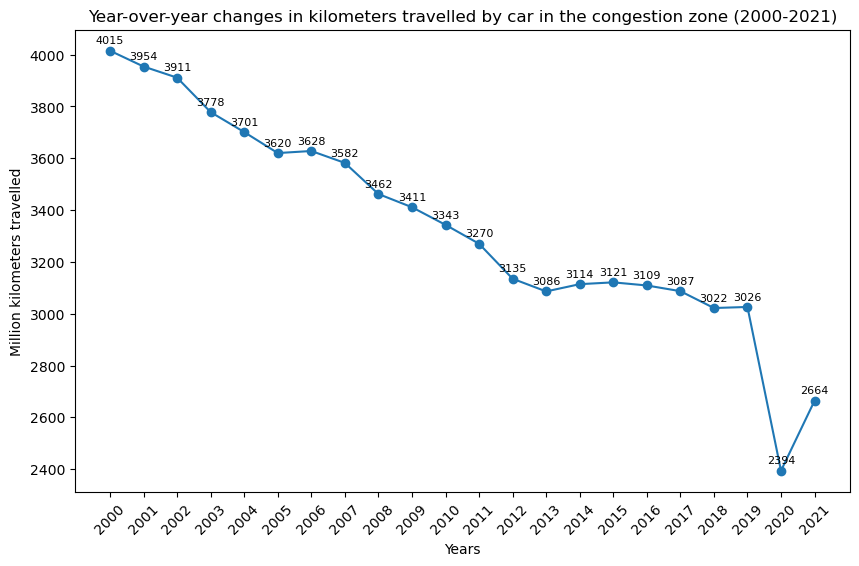

In [102]:
# Read the dataset
km_travelled_filepath = 'Downloads/traffic-flow-borough.csv'
km_travelled = pd.read_csv(km_travelled_filepath)

# Extract relevant rows for the specified local authorities and years
relevant_authorities = [
    'Westminster', 'Lambeth', 'Southwark', 'City of London',
    'Tower Hamlets', 'Islington', 'Camden'
]
relevant_years = [str(year) for year in range(2000, 2022)]

filtered_data = km_travelled[
    (km_travelled['Local Authority'].isin(relevant_authorities)) &
    (km_travelled['LA Code'].str.startswith('E09'))  # Filtering out regions only
]

# Select specific columns for the years 2000 to 2021
filtered_data = filtered_data[['Local Authority'] + relevant_years]

# Convert values to numeric (as there might be commas in numeric values)
filtered_data[relevant_years] = filtered_data[relevant_years].apply(
    lambda x: x.str.replace(',', '').astype(float)
)

# Sum the total kilometres travelled for the specified authorities
filtered_data['Total_KM'] = filtered_data[relevant_years].sum(axis=1)

# Plot the graph for the combined total of specified local authorities
plt.figure(figsize=(10, 6))
plt.plot(relevant_years, filtered_data[relevant_years].sum(), marker='o', linestyle='-')
plt.title('Year-over-year changes in kilometers travelled by car in the congestion zone (2000-2021)')
plt.xlabel('Years')
plt.ylabel('Million kilometers travelled')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adding annotations for each point on the graph
for i, txt in enumerate(filtered_data[relevant_years].sum()):
    plt.annotate(f'{txt:.0f}', (relevant_years[i], filtered_data[relevant_years].sum()[i]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

plt.show()
